In [1]:
from functions import *
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import mss
import sched, time
import cv2
import time
from tqdm import tqdm

In [2]:
from XboxController import *

In [3]:
import asyncio
import evdev
from evdev import list_devices, InputDevice, InputEvent, categorize, ecodes, UInput
import evdev

In [4]:
import re

In [5]:
import pytesseract

In [6]:
def replicate(source_device, target_device):
    for event in source_device.async_read_loop():
        #print('Man Generated Event',event)
        target_device.write_event(event)


dev = InputDevice( list_devices()[0] )

# Then create our own devices for our own events.
# (It is possible to write events directly to the original device, but that has caused me mysterious problems in the past.)
virtual_gamepad = UInput.from_device(dev, name="virtual-gamepad")

# Now we monopolize the original devices.
dev.grab()

monitor_thread = threading.Thread(target=replicate, args=(dev, virtual_gamepad))
monitor_thread.daemon = True
monitor_thread.start()

In [143]:
import subprocess
import pyautogui

def generate_emulator_pid():

    p = subprocess.Popen(['gens','/home/ormenesse/Documents/Reinforced_Outrun/OutRun (USA, Europe).md'])
    
    time.sleep(0.5)
        
    # you gotta have xdotool installed in your machine
    
    output = subprocess.check_output(['xdotool','search','--pid',str(p.pid)])
    xw_id = re.findall('(\d+)',str(output))[1]
    output = subprocess.run(['xwininfo','-id',xw_id],stdout=subprocess.PIPE)
    output = output.stdout.decode('utf-8')
    
    #get screens positions

    upperleftx = int(re.findall('upper-left X:\s+(\d+)',output)[0])
    upperlefty = int(re.findall('upper-left Y:\s+(\d+)',output)[0])

    # load quick save state
    time.sleep(0.15)
    pyautogui.press('f8')

    return p, upperleftx, upperlefty

def kill_process(p):

    p.kill()


In [144]:
def capture(graber,positionx,positiony):

    #print("Comecando a gavar...")
    sct_img = graber.grab({'left': positionx, 'top': positiony+40, 'width': 640, 'height': 446})
    Img = Image.frombytes('RGB', sct_img.size, sct_img.bgra, 'raw', 'BGRX')
    Img.thumbnail((320,220), Image.ANTIALIAS)
    Img = np.array(Img.convert('L')).astype(np.uint8)
    #Img = Img.T
    return Img

In [145]:
graber = mss.mss()

In [252]:
p, x, y = generate_emulator_pid()
img = capture(graber,x,y)

In [253]:
img = capture(graber,x,y)

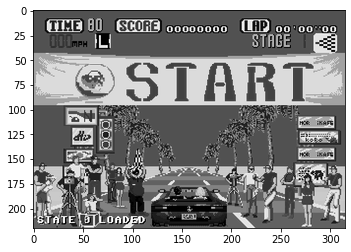

In [254]:
#plt.figure(figsize=(10,10))
plt.imshow(img,cmap='gray', vmin=0, vmax=255)

In [255]:
img.shape

(220, 315)

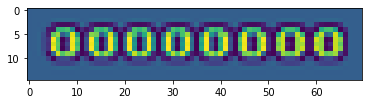

In [256]:
plt.imshow(img[12:27,130:200])

In [257]:
res = cv2.resize(img[12:27,130:200], dsize=(4*img[12:27,130:200].shape[1],4*img[12:27,130:200].shape[0]), interpolation=cv2.INTER_CUBIC)

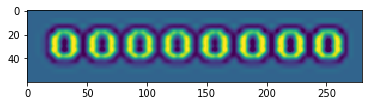

In [258]:
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
skel = np.zeros(res.shape,np.uint8)
eroded = cv2.erode(res,element)
temp = cv2.dilate(eroded,element)
temp = cv2.subtract(res,temp)
skel = cv2.bitwise_or(skel,temp)
plt.imshow(res)

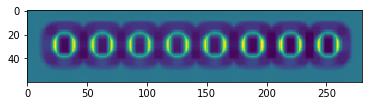

In [259]:
element = cv2.getStructuringElement(cv2.MORPH_ERODE,(5,5))
eroded = cv2.erode(cv2.blur(res,(5,5)),element)
plt.imshow(eroded)

In [260]:
#pytesseract.image_to_string(cv2.blur(res,(5,5)),nice=1,config='--psm 7 --oem 3 outputbase digits')

In [261]:
pytesseract.image_to_string(eroded,nice=1,config='--psm 7 --oem 3')

'00000000'

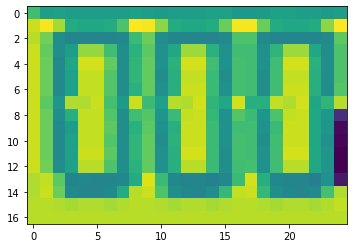

In [262]:
plt.imshow(img[23:40,15:40])

In [263]:
res = cv2.resize(img[23:40,15:40], dsize=(2*img[23:40,15:40].shape[1],2*img[23:40,15:40].shape[0]), interpolation=cv2.INTER_CUBIC)

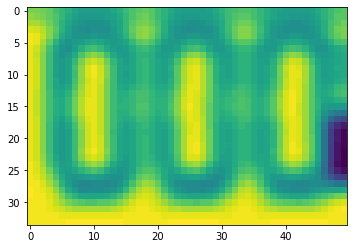

In [264]:
plt.imshow(cv2.blur(res,(5,5)))

In [265]:
pytesseract.image_to_string(cv2.blur(res,(5,5)),config='digits')

''

In [ ]:
imagens = []
resultado = []
while True:
    img = capture(graber,x,y)
    imagens.append(img)
    res = cv2.resize(img[12:27,130:200], dsize=(4*img[12:27,130:200].shape[1],4*img[12:27,130:200].shape[0]), interpolation=cv2.INTER_CUBIC)
    rest = pytesseract.image_to_string(cv2.blur(res,(5,5)),nice=1,config='--psm 7 --oem 3 digits')
    resultado.append(rest)
    #print(rest)

In [267]:
remains = []
for i,j in enumerate(resultado):
    if len(j) == 8:
        try:
            numero = int(j)
            remains.append(i)
        except:
            pass

In [268]:
len(remains),len(resultado)

(2621, 4775)

In [269]:
save_to_file(np.array(resultado)[remains],'numbers_2.pkl')
save_to_file(np.array(imagens)[remains],'images_2.pkl')

In [1]:
import subprocess

In [ ]:
subprocess.Popen()

In [ ]:
subprocess.run()

In [2]:
import numpy as np

In [3]:
np.float

float